In [1]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv(r"Datasets\Fake News Dataset\fake_news_preprocess.csv")

In [4]:
data.head()

,id,text,Polarity
0,8476,"You Can Smell Hillary’s FearDaniel Greenfield,...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,3608,Kerry to go to Paris in gesture of sympathyU.S...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,0
4,875,The Battle of New York: Why This Primary Matte...,1


In [5]:
data.shape

(6335, 3)

In [11]:
data.replace({0: "Fake", 1:"True"}, inplace=True)

In [14]:
data.value_counts("Polarity")

Polarity
True    3171
Fake    3164
Name: count, dtype: int64

In [24]:
true_news = data[data["Polarity"]=="True"]
fake_news = data[data["Polarity"]=="Fake"]

Number of news articles 

In [ ]:
true_news_number = len(true_news)
fake_news_number = len(fake_news)

In [19]:
true_news_number

3171

In [18]:
fake_news_number

3164

Text length

In [26]:
def get_num_tokens(text):
    
    doc = nlp(text)
    tokens = [token for token in doc]
    n_tokens = len(tokens)
    
    return n_tokens

In [28]:
true_news["length"] = true_news["text"].apply(get_num_tokens)
fake_news["length"] = fake_news["text"].apply(get_num_tokens)

C:\Users\alber\AppData\Local\Temp\ipykernel_17816\342297047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news["length"] = true_news["text"].apply(get_num_tokens)
C:\Users\alber\AppData\Local\Temp\ipykernel_17816\342297047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news["length"] = fake_news["text"].apply(get_num_tokens)


Mean length

In [30]:
np.mean(true_news["length"])

1060.494481236203

In [31]:
np.mean(fake_news["length"])

813.9194058154235

Length deviation

In [32]:
np.std(true_news["length"])

874.041013727704

In [33]:
np.std(fake_news["length"])

1128.4315231405697

Median length

In [51]:
np.median(true_news["length"])

933.0

In [52]:
np.median(fake_news["length"])

512.0

Visualizing Length Distribution

In [42]:
plot_df = pd.concat([fake_news, true_news])

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

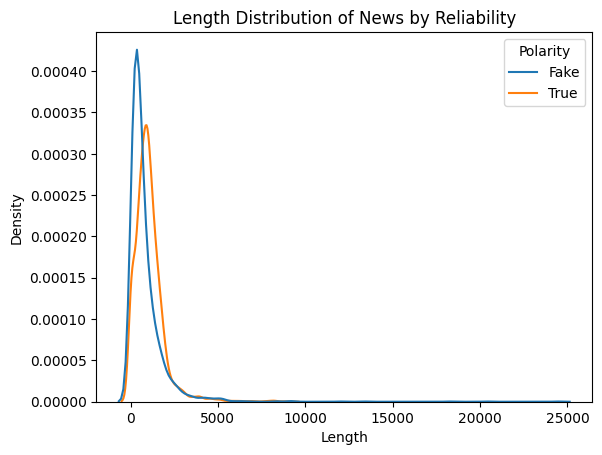

In [48]:
sns.kdeplot(data = plot_df, 
            x = "length",
            hue = "Polarity")

plt.title("Length Distribution of News by Reliability")
plt.xlabel("Length")
plt.show()



c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312

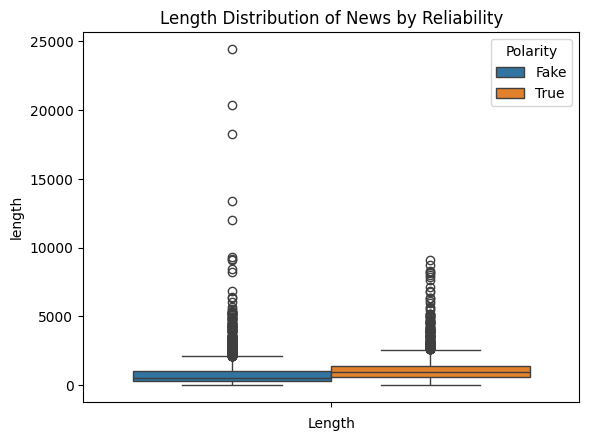

In [60]:
sns.boxplot(data = plot_df, 
            y = "length",
            hue = "Polarity")

plt.title("Length Distribution of News by Reliability")
plt.xlabel("Length")
plt.show()

In [23]:
# str_true_news = true_news["text"].str.join(" ")
# str_fake_news = fake_news["text"].str.join(" ")